In [7]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1. Download all the images from the given link

In [59]:
images_loc = ['images/a.jpg', 'images/b.jpg', 'images/c.jpg']

def read(loc):
    return cv.imread(loc, cv.COLOR_RGB2BGR)

def show(image, title='Image'):
    plt.axis('off')
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), interpolation='none')
    plt.show()

    
images = list(map(read, images_loc))

2. Reduce the amount of colors in the images

In [66]:
def tennis_ball_mask(image):

    green_lower = (20, 100, 180)
    green_upper = (60, 255, 255)

    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
 
    mask = cv.inRange(hsv, green_lower, green_upper)
    mask = cv.dilate(mask, None, iterations=2)
    mask = cv.erode(mask, None, iterations=2)
    
    return mask

3. Find all images with a basketball

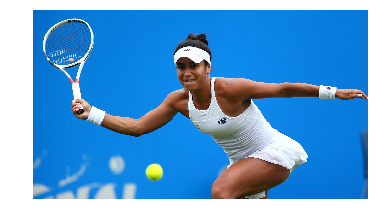

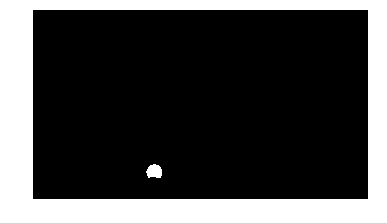

In [81]:
show(images[2])
mask = tennis_ball_mask(images[2])
show(cv.cvtColor(mask, cv.COLOR_GRAY2BGR))

[array([[[506, 643]],

       [[505, 644]],

       [[500, 644]],

       [[499, 645]],

       [[498, 645]],

       [[496, 647]],

       [[495, 647]],

       [[494, 648]],

       [[491, 648]],

       [[490, 649]],

       [[489, 649]],

       [[487, 651]],

       [[486, 651]],

       [[482, 655]],

       [[482, 656]],

       [[480, 658]],

       [[480, 659]],

       [[478, 661]],

       [[478, 663]],

       [[477, 664]],

       [[477, 665]],

       [[476, 666]],

       [[476, 668]],

       [[475, 669]],

       [[475, 671]],

       [[474, 672]],

       [[474, 678]],

       [[475, 679]],

       [[475, 684]],

       [[476, 685]],

       [[476, 686]],

       [[478, 688]],

       [[478, 690]],

       [[479, 691]],

       [[479, 692]],

       [[480, 693]],

       [[480, 695]],

       [[481, 696]],

       [[481, 697]],

       [[485, 701]],

       [[488, 701]],

       [[489, 700]],

       [[489, 699]],

       [[490, 698]],

       [[490, 697]],

       [[

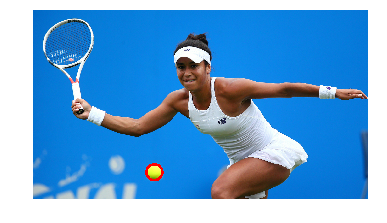

In [84]:
def mark_object(image, mask):

    contours = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[-2]

    print(contours)
    
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(contours, key=cv.contourArea)
    ((x, y), radius) = cv.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv.circle(image, (int(x), int(y)), int(radius), (0, 0, 255), 10)
    return image

marked = mark_object(images[2], mask)
show(marked)